# Jack Importing COVID Case Data

In [1]:
# Jack Import Incremental COVID Cases per 100,000
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as st
from scipy.stats import linregress
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import requests
import time
import json

inc_cases_per_100000 = "../Jack/Data/New_cases_per_100000.csv"

inc_cases_per_100000_df = pd.read_csv(inc_cases_per_100000, encoding="ISO-8859-1") 

inc_cases_per_100000_df.head()

,ï»¿Month,Alaska,Arkansas,Colorado,Connecticut,Delaware,Florida,Illinois,Kansas,Kentucky,Louisiana,Massachusetts,Missouri,North Dakota,Tennessee,Texas,Utah,Virginia,Wisconsin
0,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-01,3.6,4.2,10.4,13.2,6.3,5.1,8.4,2.5,2.4,20.3,16.1,3.4,3.3,6.1,2.0,5.5,2.9,4.9
2,2020-04-01,34.1,54.5,141.9,423.2,229.6,96.4,202.7,60.2,53.1,428.3,457.1,75.1,61.5,86.1,52.6,81.5,89.3,63.1
3,2020-05-01,16.2,101.9,217.7,580.7,533.9,107.1,506.1,199.4,110.9,287.6,735.5,95.1,179.7,163.7,104.5,138.4,266.2,144.7
4,2020-06-01,38.9,283.6,143.3,243.7,306.6,191.8,338.6,138.7,120.6,291.3,321.9,99.5,162.9,213.6,185.5,262.3,290.5,217.8


In [2]:
#Jack Clean Columns
list(inc_cases_per_100000_df.columns.values)
inc_cases_per_100000_df = inc_cases_per_100000_df.rename(columns={"ï»¿Month": "Month"})
inc_cases_per_100000_df.sample(10)

,Month,Alaska,Arkansas,Colorado,Connecticut,Delaware,Florida,Illinois,Kansas,Kentucky,Louisiana,Massachusetts,Missouri,North Dakota,Tennessee,Texas,Utah,Virginia,Wisconsin
6,2020-08-01,331.5,707.1,237.3,92.1,304.4,1150.7,377.8,460.0,390.3,1063.2,151.9,567.8,535.9,872.8,814.2,460.6,364.7,448.1
4,2020-06-01,38.9,283.6,143.3,243.7,306.6,191.8,338.6,138.7,120.6,291.3,321.9,99.5,162.9,213.6,185.5,262.3,290.5,217.8
0,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-09-01,309.6,653.8,180.6,109.4,291.4,489.1,471.2,558.3,432.9,493.9,152.3,634.7,1037.4,643.4,509.5,447.3,344.7,535.6
10,2020-12-01,2328.9,1918.5,2183.6,1734.1,1831.6,1202.6,2260.2,2457.0,1966.1,1459.2,1547.5,1780.9,3085.4,2459.9,1382.2,2624.4,1031.4,2472.1
11,2021-01-01,850.6,1326.1,818.6,996.1,1204.1,888.8,887.0,1254.1,1010.5,928.9,1121.4,796.5,653.5,1777.8,918.5,1340.6,808.5,860.3
2,2020-04-01,34.1,54.5,141.9,423.2,229.6,96.4,202.7,60.2,53.1,428.3,457.1,75.1,61.5,86.1,52.6,81.5,89.3,63.1
8,2020-10-01,605.3,833.5,379.5,230.6,381.7,367.8,607.2,688.1,619.2,394.0,240.0,768.7,1983.9,735.7,487.1,969.4,334.8,1313.9
1,2020-03-01,3.6,4.2,10.4,13.2,6.3,5.1,8.4,2.5,2.4,20.3,16.1,3.4,3.3,6.1,2.0,5.5,2.9,4.9
5,2020-07-01,152.4,595.3,166.5,81.5,292.8,1044.6,209.5,323.9,202.9,841.4,106.9,255.7,234.4,596.7,670.0,523.6,241.7,320.0


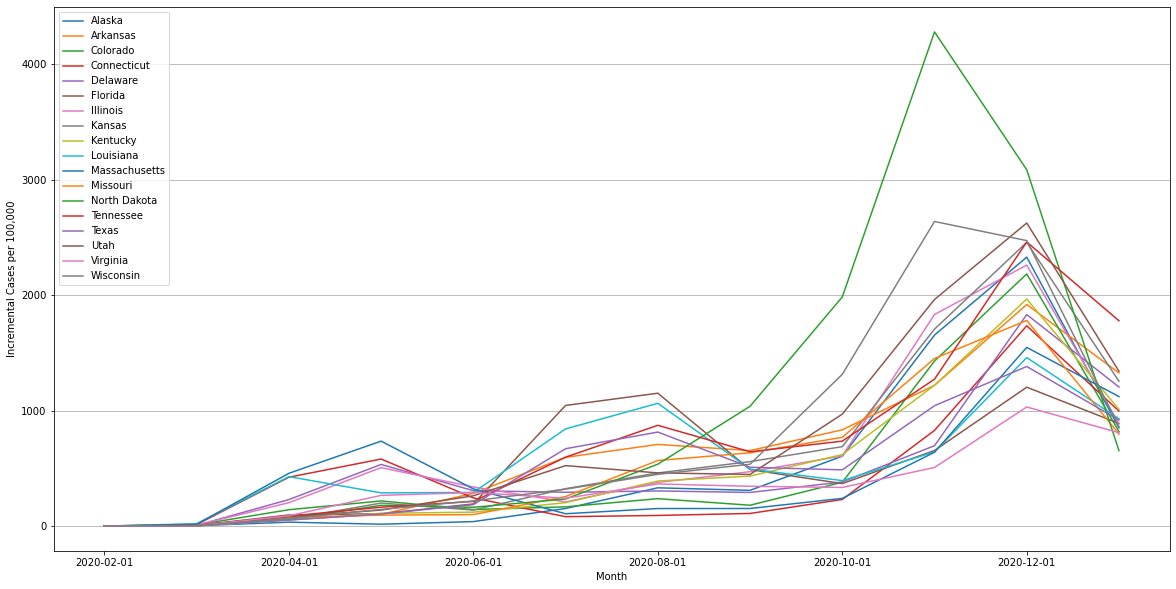

In [3]:
#Graph All
lines_inc = inc_cases_per_100000_df.plot.line(x = "Month", figsize =(20,10))
lines_inc.set_ylabel("Incremental Cases per 100,000")
lines_inc.grid('off', which='major', axis='y' )

# Jack Importing Political Party Data and Graphing


In [5]:
# Jack Import Governor Data
gov_data = "../Jack/Data/governor_political_party.csv"
gov_data_df = pd.read_csv(gov_data, encoding="ISO-8859-1") 
gov_data_df = gov_data_df.rename(columns={"ï»¿State": "State"})
gov_data_df

,State,Political Party
0,Alaska,Republican
1,Arkansas,Republican
2,Colorado,Democrat
3,Connecticut,Democrat
4,Delaware,Democrat
5,Florida,Republican
6,Illinois,Republican
7,Kansas,Democrat
8,Kentucky,Democrat
9,Louisiana,Democrat


['Colorado', 'Connecticut', 'Delaware', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Oregon', 'Virginia', 'Wisconsin']


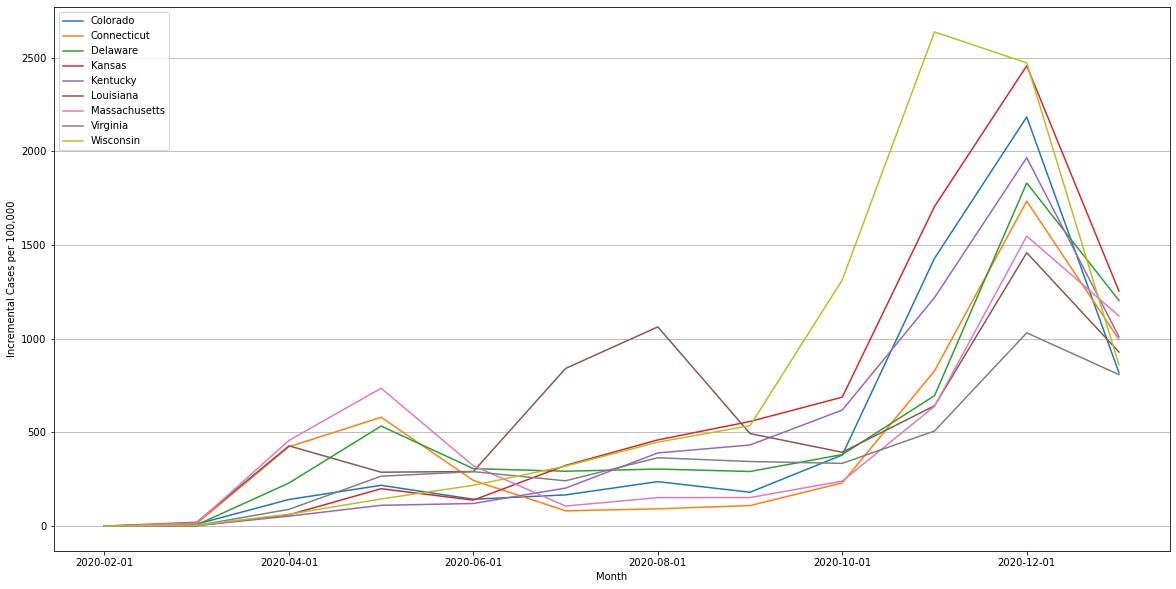

In [6]:
#Jack Graph Democratic Curves
dem_df = gov_data_df.loc[gov_data_df['Political Party'] == 'Democrat']
dem_states = dem_df['State'].tolist()
print(dem_states)


dem_data_df = inc_cases_per_100000_df[['Month', 'Colorado', 'Connecticut', 'Delaware', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Virginia', 'Wisconsin']]

dem_lines_inc = dem_data_df.plot.line(x = "Month", figsize =(20,10))
dem_lines_inc.set_ylabel("Incremental Cases per 100,000")
dem_lines_inc.grid('off', which='major', axis='y' )
plt.savefig("Democratic State COVID Cases.png")

['Alaska', 'Arkansas', 'Florida', 'Illinois', 'Missouri', 'North Dakota', 'Tennessee', 'Texas', 'Utah']


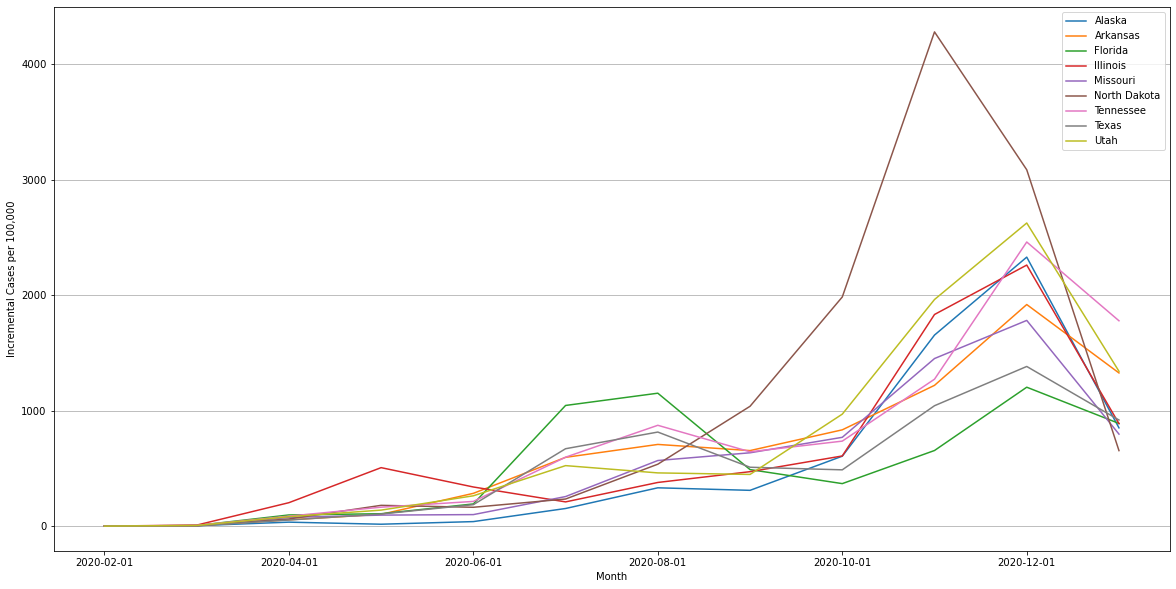

In [7]:
#Graph Republican Curves
repub_df = gov_data_df.loc[gov_data_df['Political Party'] == 'Republican']
repub_states = repub_df['State'].tolist()
print(repub_states)

repub_data_df = inc_cases_per_100000_df[['Month', 'Alaska', 'Arkansas', 'Florida', 'Illinois', 'Missouri', 'North Dakota', 'Tennessee', 'Texas', 'Utah']]

repub_lines_inc = repub_data_df.plot.line(x = "Month", figsize =(20,10))
repub_lines_inc.set_ylabel("Incremental Cases per 100,000")
repub_lines_inc.grid('off', which='major', axis='y' )
plt.savefig("Republican State COVID Cases.png")

In [8]:
#Jack Dropping last month of COVID data as it is incomplete
#avgs_df = avgs_df.drop(avgs_df.index[-1])


month_list = dem_data_df['Month'].tolist()


col_dem = dem_data_df.loc[: , "Colorado":"Wisconsin"]
dem_data_df['Dem_avg'] = col_dem.mean(axis=1)
dem_avgs = dem_data_df['Dem_avg'].tolist()


col_rep = repub_data_df.loc[: , "Alaska":"Utah"]
repub_data_df['Rep_avg'] = col_rep.mean(axis=1)
repub_avgs = repub_data_df['Rep_avg'].tolist() 

avgs_df = pd.DataFrame(list(zip(month_list, dem_avgs, repub_avgs)), 
               columns =['Month','Dem Avg', 'Repub Avg']) 

avgs_df['Difference'] = avgs_df['Repub Avg'] - avgs_df['Dem Avg']
 

<ipython-input-8-6cc08629366e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dem_data_df['Dem_avg'] = col_dem.mean(axis=1)
<ipython-input-8-6cc08629366e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repub_data_df['Rep_avg'] = col_rep.mean(axis=1)


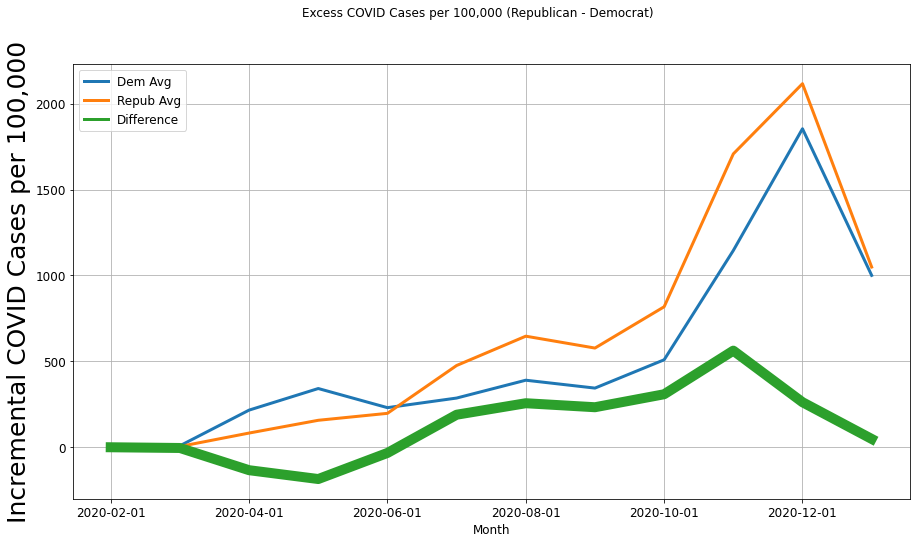

<Figure size 432x288 with 0 Axes>

In [9]:
#Jack Graph 
fig, ax = plt.subplots()
avgs_df.plot(x = "Month", figsize=(15,8),  
        lw=3, fontsize=12, ax=ax, grid=True)
plt.gcf().suptitle("Excess COVID Cases per 100,000 (Republican - Democrat)",fontsize=12)
plt.legend(loc=2, prop={'size': 12})
plt.ylabel("Incremental COVID Cases per 100,000", fontsize=25)
plt.xlabel("Month", fontsize=12)


for line in ax.get_lines():
    if line.get_label() == 'Difference':
        line.set_linewidth(10)
plt.show()

plt.savefig("Exccess COVID Cases, Republicans versus Democrats.png")

# Jack Importing Alcohol Data


In [10]:
#Jack loan in alcohol data
file_path = "../Shadee/Data/alcsales_August2020_codedfullfile.csv"

# Read Purchasing File and store into Pandas data frame
alcohol_sales_data = pd.read_csv(file_path)
alcohol_sales_data['Month - Year (Date)'] = pd.to_datetime(alcohol_sales_data['Month - Year (Word)'])
alcohol_sales_data.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
1,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,January,January 2017,1 2017,2017-01-01
2,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,January,January 2017,1 2017,2017-01-01
3,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,January,January 2017,1 2017,2017-01-01
4,2017,1,10,1,180388,74139,799550,0.0927,Delaware,January,January 2017,1 2017,2017-01-01


# Jack Analysis Between Political Party and Alcohol Consumption

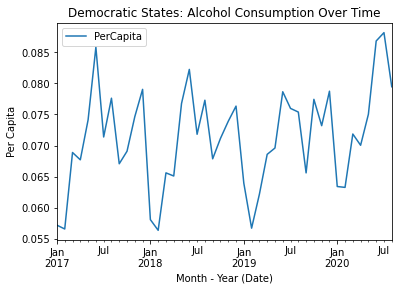

In [11]:
#Jack Dem state alcohol consumption
dem_data_consumption_df = alcohol_sales_data.loc[alcohol_sales_data["State"].isin(['Colorado', 'Connecticut', 'Delaware', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Virginia', 'Wisconsin'])]

month_date_alcohol_sales_groupby = dem_data_consumption_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_avg_pop = month_date_alcohol_sales_groupby["Population"].mean()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

dem_cleaned_month_date_alcohol_sales_groupby_df = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_avg_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Plot
dem_cleaned_month_date_alcohol_sales_groupby_df.plot.line( y='PerCapita', title="Democratic States: Alcohol Consumption Over Time")
plt.ylabel('Per Capita')

plt.savefig("demstates_alcohol_consumption.png")



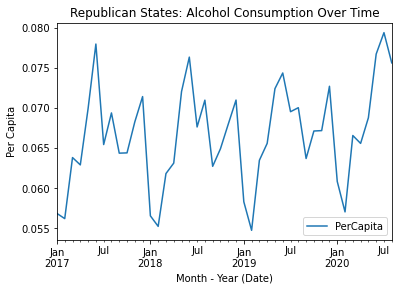

In [12]:
#Jack Repub state alcohol consumption

repub_data_consumption_df = alcohol_sales_data.loc[alcohol_sales_data["State"].isin(['Alaska', 'Arkansas', 'Florida', 'Illinois', 'Missouri', 'North Dakota', 'Tennessee', 'Texas', 'Utah'])]

month_date_alcohol_sales_groupby = repub_data_consumption_df.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_avg_pop = month_date_alcohol_sales_groupby["Population"].mean()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

repub_cleaned_month_date_alcohol_sales_groupby_df = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_avg_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Plot
repub_cleaned_month_date_alcohol_sales_groupby_df.plot.line( y='PerCapita', title="Republican States: Alcohol Consumption Over Time")
plt.ylabel('Per Capita')

plt.savefig("repubstates_alcohol_consumption.png")

Text(0, 0.5, 'Per Capita')

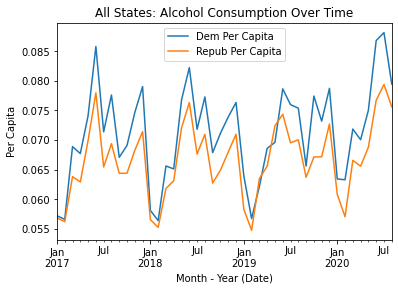

In [13]:
#Jack Republican versus Democrat alcohol consumption over time

combined_df = dem_cleaned_month_date_alcohol_sales_groupby_df

combined_df["repub per capita"] = repub_cleaned_month_date_alcohol_sales_groupby_df['PerCapita']
combined_df = combined_df.drop('Gallons', 1)
combined_df = combined_df.drop('Ethanol', 1)
combined_df = combined_df.drop('Population', 1)
combined_df = combined_df.rename(columns={'PerCapita': 'Dem Per Capita', 'repub per capita': 'Repub Per Capita'})

combined_df.plot.line(title="All States: Alcohol Consumption Over Time")
plt.ylabel('Per Capita')

In [14]:
#Jack creating difference between dem pc consumption and repub pc consumption

combined_df['Difference'] = combined_df['Dem Per Capita'] - combined_df['Repub Per Capita']

In [16]:
#Jack create data frame for yearly difference between republican and dem

combined_for_years_df = combined_df

data_2017 = combined_for_years_df.iloc[0:12]
difference_data_2017 = data_2017['Difference'].tolist()
difference_data_2017
combined_for_years_df = combined_for_years_df.drop(combined_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2018 = combined_for_years_df['Difference'].tolist()
difference_data_2018
combined_for_years_df = combined_for_years_df.drop(combined_for_years_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2019 = combined_for_years_df['Difference'].tolist()
difference_data_2019
combined_for_years_df = combined_for_years_df.drop(combined_for_years_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2020 = combined_for_years_df['Difference'].tolist()
difference_data_2020
month_numbers = [1,2,3,4,5,6,7,8,9,10,11,12]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', "August", 'September', 'October', 'November', 'December']


by_year_difference_df = pd.DataFrame(list(zip(months, difference_data_2017,difference_data_2018,difference_data_2019,difference_data_2020)), 
               columns =['Month', '2017','2018','2019', '2020']) 

by_year_difference_df.head()


,Month,2017,2018,2019,2020
0,January,0.000362,0.001553,0.005658,0.002586
1,February,0.000395,0.001148,0.001986,0.006240
2,March,0.005071,0.003796,-0.001303,0.005292
3,April,0.004808,0.001985,0.003002,0.004468
4,May,0.004201,0.004719,-0.002804,0.006252


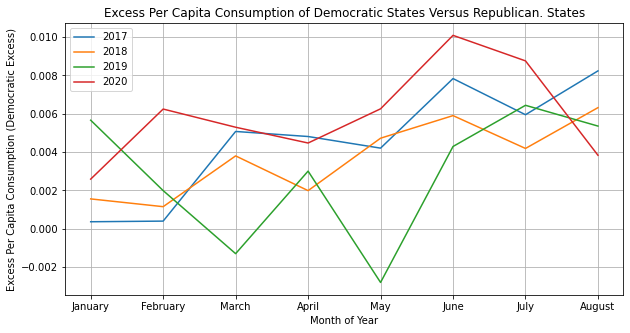

In [17]:
#Jack graph yearls excess btwn dem and repub states

by_year_difference_df.plot.line(x = 'Month',grid=True, figsize =(10,5),title="Excess Per Capita Consumption of Democratic States Versus Republican. States")
plt.ylabel('Excess Per Capita Consumption (Democratic Excess)')
plt.xlabel('Month of Year')

plt.savefig("Excess Per Capita Consumption of Democratic States Versus Republican States.png")              
                      

In [18]:
month_date_alcohol_sales_groupby = alcohol_sales_data.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_avg_pop = month_date_alcohol_sales_groupby["Population"].mean()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

cleaned_month_date_alcohol_sales_groupby_df = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_avg_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

cleaned_month_date_alcohol_sales_groupby_df.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,213428134,17952672,5.841676e+06,0.057390
2017-02-01,202554024,17181353,5.841676e+06,0.056627
2017-03-01,234341479,19741824,5.841676e+06,0.066356
2017-04-01,242022452,19623984,5.841676e+06,0.065969
2017-05-01,253716538,20843786,5.841676e+06,0.071760


In [19]:
#jack create DF for all states, yearly alcohol consumption

combined_all_parties_df = cleaned_month_date_alcohol_sales_groupby_df
combined_all_parties_df = combined_all_parties_df.drop('Gallons', 1)
combined_all_parties_df = combined_all_parties_df.drop('Ethanol', 1)
combined_all_parties_df = combined_all_parties_df.drop('Population', 1)

data_2017_all = combined_all_parties_df.iloc[0:12]
difference_data_2017_all = data_2017_all['PerCapita'].tolist()
difference_data_2017_all
combined_all_parties_df = combined_all_parties_df.drop(combined_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2018_all = combined_all_parties_df['PerCapita'].tolist()
difference_data_2018_all
combined_all_parties_df = combined_all_parties_df.drop(combined_all_parties_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2019_all = combined_all_parties_df['PerCapita'].tolist()
difference_data_2019_all
combined_all_parties_df = combined_all_parties_df.drop(combined_all_parties_df.index[[0,1,2,3,4,5,6,7,8,9,10,11]])
difference_data_2020_all = combined_all_parties_df['PerCapita'].tolist()
difference_data_2020_all
month_numbers = [1,2,3,4,5,6,7,8,9,10,11,12]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', "August", 'September', 'October', 'November', 'December']


by_year_difference_all_df = pd.DataFrame(list(zip(months, difference_data_2017_all,difference_data_2018_all,difference_data_2019_all,difference_data_2020_all)), 
               columns =['Month', '2017','2018','2019', '2020']) 

by_year_difference_all_df


,Month,2017,2018,2019,2020
0,January,0.057390,0.057475,0.061385,0.062223
1,February,0.056627,0.056246,0.055933,0.060258
2,March,0.066356,0.063321,0.062573,0.068242
3,April,0.065969,0.064217,0.067483,0.067813
4,May,0.071760,0.074300,0.071352,0.071890
5,June,0.081704,0.079167,0.076181,0.081196
6,July,0.069156,0.070592,0.073058,0.083533
7,August,0.073642,0.074433,0.072623,0.077372


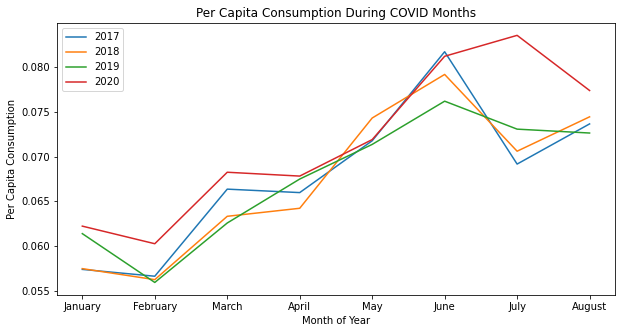

In [20]:
#jack create graph for all states, yearly consumption

by_year_difference_all_df.plot.line(x = 'Month',figsize =(10,5),title="Per Capita Consumption During COVID Months")
plt.ylabel('Per Capita Consumption')
plt.xlabel('Month of Year')
plt.savefig("All_states_alcohol_consumption_by_year.png")

# Re-Import & Format Data

In [4]:
# Alcohol Consumption raw data file to load
file_path = "Data/alcsales_August2020_codedfullfile.csv"

# Read file and store into data frame
alcohol_sales_data = pd.read_csv(file_path)

# Set date/time format
alcohol_sales_data['Month - Year (Date)'] = pd.to_datetime(alcohol_sales_data['Month - Year (Word)'])

# Save updated format to csv
alcohol_sales_data.to_csv(r'Data/alcsales_August2020_codedfullfile_2.csv', index = False)

# Show dataframe head
alcohol_sales_data.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
1,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,January,January 2017,1 2017,2017-01-01
2,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,January,January 2017,1 2017,2017-01-01
3,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,January,January 2017,1 2017,2017-01-01
4,2017,1,10,1,180388,74139,799550,0.0927,Delaware,January,January 2017,1 2017,2017-01-01


# Aggregate Data From All States Over Time

In [5]:
# Group all states data by month/year/date format
month_date_alcohol_sales_groupby = alcohol_sales_data.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_total_pop = month_date_alcohol_sales_groupby["Population"].sum()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

#Create Data Frame
total_alcohol_gallons_over_time_by_date = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_total_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Show head of Data Frame
total_alcohol_gallons_over_time_by_date.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,213428134,17952672,303767158,0.057390
2017-02-01,202554024,17181353,303767158,0.056627
2017-03-01,234341479,19741824,303767158,0.066356
2017-04-01,242022452,19623984,303767158,0.065969
2017-05-01,253716538,20843786,303767158,0.071760


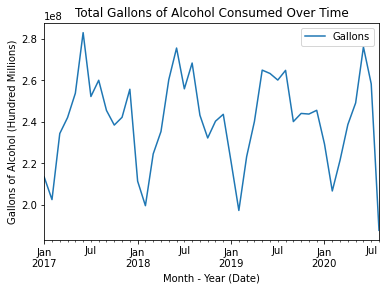

In [6]:
#Plot gallons of alcohol over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='Gallons', title="Total Gallons of Alcohol Consumed Over Time")
plt.ylabel('Gallons of Alcohol (Hundred Millions)')

#Save figure to folder
plt.savefig("allstates_alcohol_consumption.png")

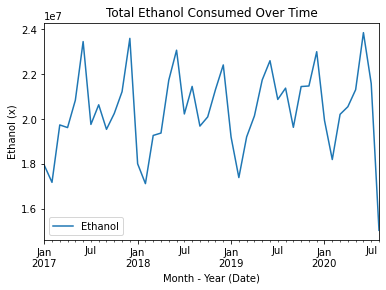

In [9]:
#Plot total ethanol over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='Ethanol', title="Total Ethanol Consumed Over Time")
plt.ylabel('Ethanol (x)')

#Save figure to folder
plt.savefig("allstates_ethanol_consumption.png")

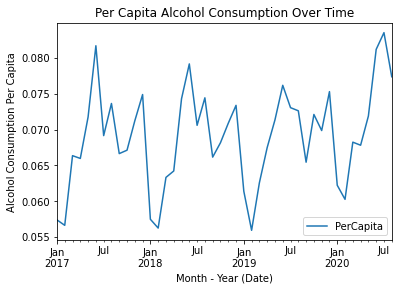

In [8]:
#Plot avg. per capita over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='PerCapita', title="Per Capita Alcohol Consumption Over Time")
plt.ylabel('Alcohol Consumption Per Capita')

#Save figure to folder
plt.savefig("allstates_percapita_consumption.png")

# Run TTest Across Years

## Running TTest for all available data

In [10]:
# Calculate the gallons mean for all states for year 2020
year_2020 = alcohol_sales_data[alcohol_sales_data["Year"] == 2020]
year_2020.PerCapita.mean()

0.07111653944020364

In [11]:
# Calculate the gallons mean for all states for year 2019
year_2019_2018_2017 = alcohol_sales_data[(alcohol_sales_data["Year"] != 2020)]
year_2019_2018_2017.PerCapita.mean()

0.06844738247863243

In [12]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(year_2020.PerCapita, year_2019_2018_2017.PerCapita, equal_var=False)

Ttest_indResult(statistic=1.4174576422248202, pvalue=0.15692431237522786)

## Running TTest to compare only months 1 - 7

In [13]:
#Clean data for limited number of months available for all years
cleaned_alcohol_data_copy = alcohol_sales_data.loc[(alcohol_sales_data["Month"] ==1) | (alcohol_sales_data["Month"] == 2) | (alcohol_sales_data["Month"] == 3)
                                      | (alcohol_sales_data["Month"] == 4) | (alcohol_sales_data["Month"] == 5) |
                                               (alcohol_sales_data["Month"] == 5) | (alcohol_sales_data["Month"] == 6)
                                               | (alcohol_sales_data["Month"] ==7)].copy()

In [14]:
# Calculate the gallons mean for all states for year 2020 v2
year_2020_v2 = cleaned_alcohol_data_copy[cleaned_alcohol_data_copy["Year"] == 2020]
year_2020_v2.PerCapita.mean()

0.07048571428571437

In [15]:
# Calculate the gallons mean for all states for year 2019 v2
year_2019_2018_2017_v2 = cleaned_alcohol_data_copy[(cleaned_alcohol_data_copy["Year"] == 2019) | (cleaned_alcohol_data_copy["Year"] == 2018) | (cleaned_alcohol_data_copy["Year"] == 2017)]
year_2019_2018_2017_v2.PerCapita.mean()

0.06677353479853486

In [16]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(year_2020_v2.PerCapita, year_2019_2018_2017_v2.PerCapita, equal_var=False)

Ttest_indResult(statistic=1.8113690688236297, pvalue=0.07061109506673731)

In [17]:
month = 2
state = 'Connecticut'

months = range(1,8)
states = alcohol_sales_data["State"].unique()

results = []

for month in months:
    for state in states:
        subset = alcohol_sales_data[(alcohol_sales_data["Month"] == month) & (alcohol_sales_data["State"] == state)]
        sample2020 = subset.loc[subset["Year"] == 2020]
        sample_baseline = subset.loc[subset["Year"] != 2020]
        
        # Calculate Independent (Two Sample) t-test
        test = stats.ttest_ind(sample2020.Gallons, sample_baseline.Gallons, equal_var=False)
        
        results.append({
            "State": state, "Month": month, "t_test_statistic": test.statistic, "pvalue": test.pvalue
        })
        
        

ttest_df = pd.DataFrame(results)
ttest_df.sort_values('pvalue')

,State,Month,t_test_statistic,pvalue
72,Utah,4,12.028184,0.000031
28,Louisiana,2,5.983048,0.001024
53,Utah,3,3.159104,0.044088
9,Louisiana,1,2.905385,0.046515
15,Utah,1,2.612168,0.052428
...,...,...,...,...
21,Colorado,2,0.003148,0.997681
46,Kentucky,3,0.001324,0.999023
123,Louisiana,7,NaN,NaN
129,Utah,7,NaN,NaN


# State by State Breakdown of Data

In [18]:
# Set groupby by State
state_alcohol_sales_groupby = alcohol_sales_data.groupby(['State'])

# Find count of data point per state
count_per_state = state_alcohol_sales_groupby.size()

# Find total gallons of ethanol per state
total_gallons_per_state = state_alcohol_sales_groupby["Gallons"].sum()

# Find total ethanol per state
total_ethanol_per_state = state_alcohol_sales_groupby["Ethanol"].sum()

#Find average population per state
total_population_per_state = state_alcohol_sales_groupby["Population"].median()

#Find per capita alcohol consumption per state
per_capita_per_state = state_alcohol_sales_groupby["PerCapita"].mean()

#Add state by state breakdown to dataframe
grouped_state_df = pd.DataFrame({
    "Count": count_per_state,
    "Gallons": total_ethanol_per_state,
    "Ethanol": total_ethanol_per_state,
    "Total Population": total_population_per_state,
    "Avg PerCapita": per_capita_per_state
})


#Save to CSV
grouped_state_df.to_csv(r'grouped_state_df.csv', index = True)

In [19]:
#Show dataframe
grouped_state_df.head()

,Count,Gallons,Ethanol,Total Population,Avg PerCapita
State,,,,,
Alaska,132,6165264,6165264,590760,0.079049
Arkansas,132,16429378,16429378,2465297,0.050443
Colorado,132,49557495,49557495,4715895,0.079425
Connecticut,129,26302609,26302609,3019150,0.067557
Delaware,129,10447503,10447503,808146,0.100049


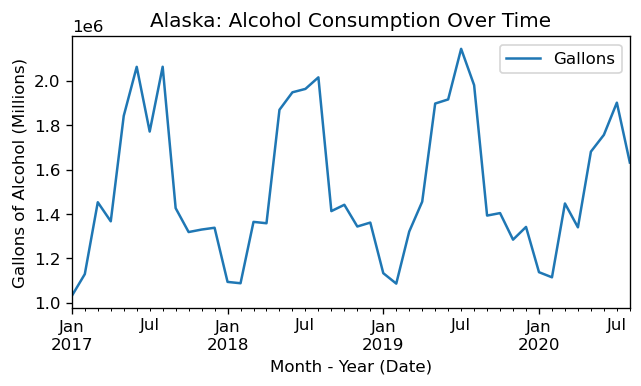

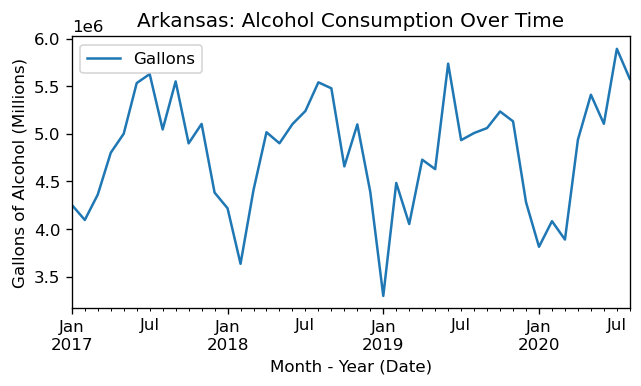

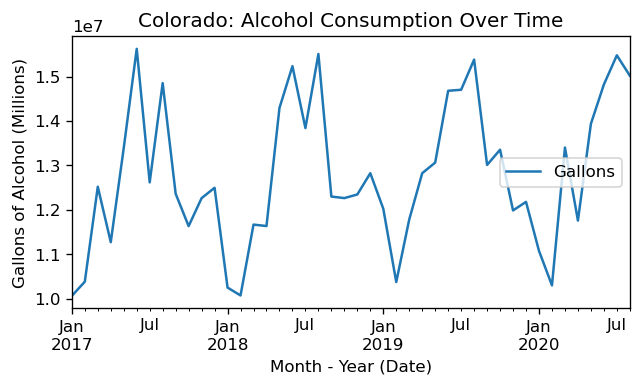

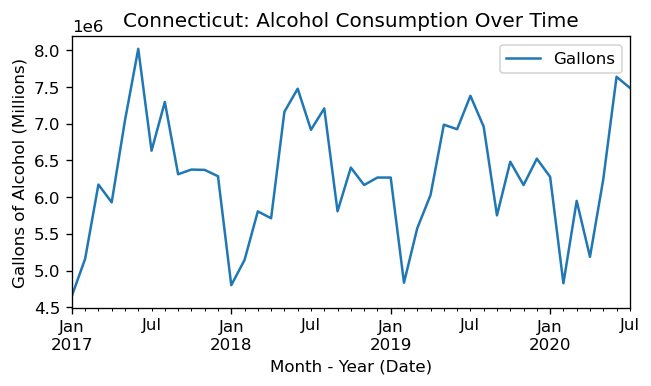

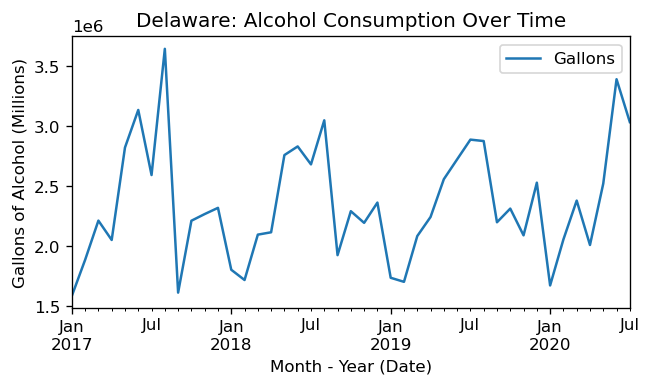

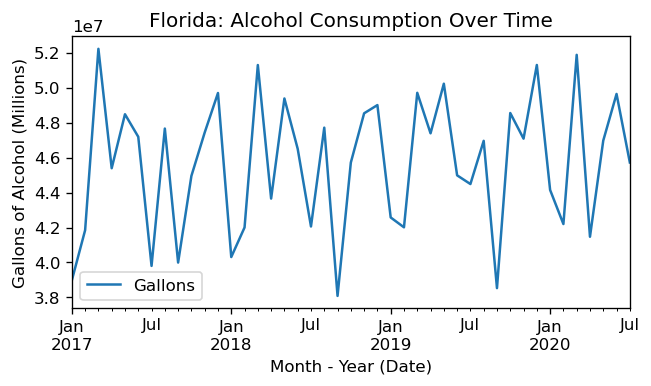

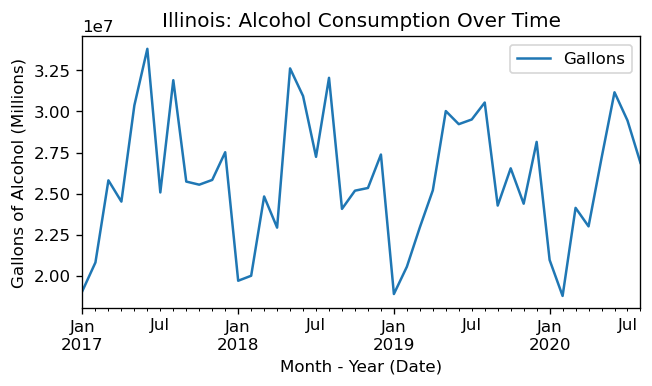

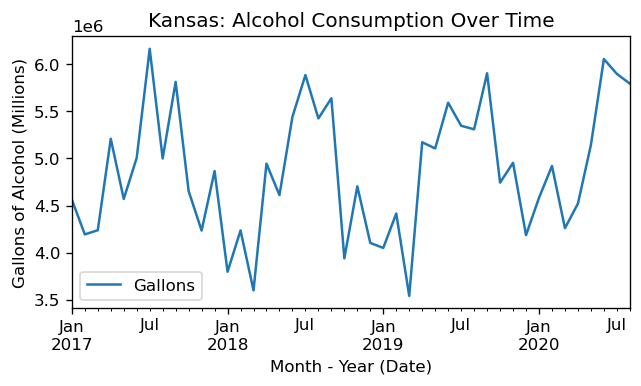

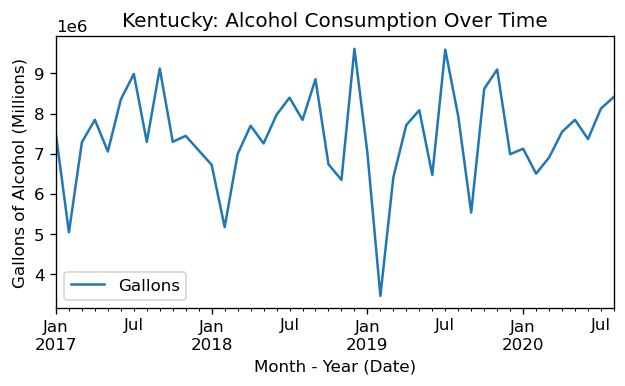

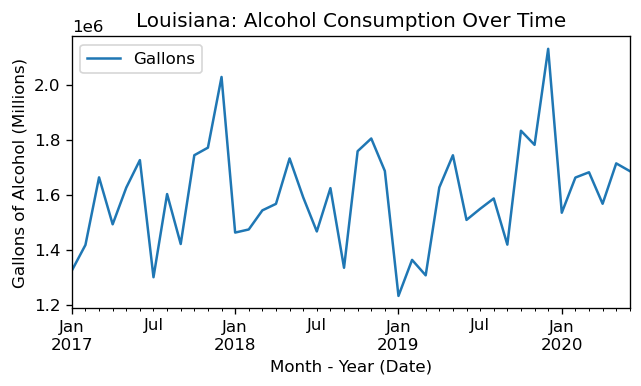

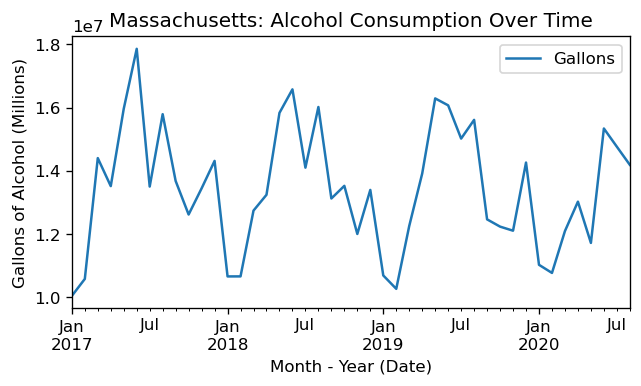

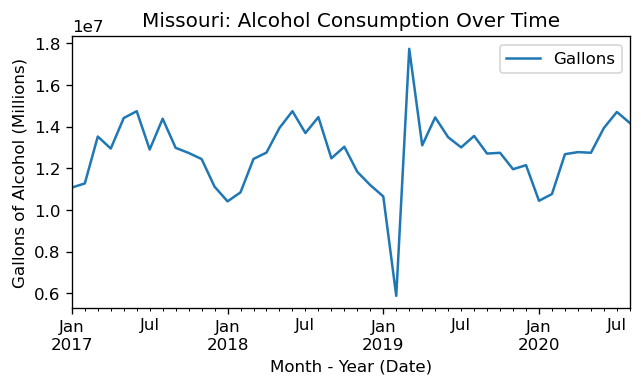

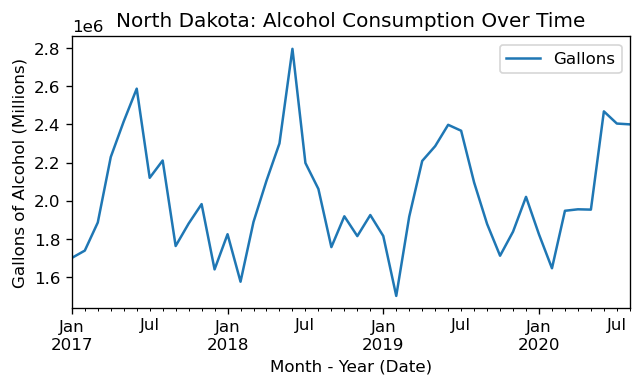

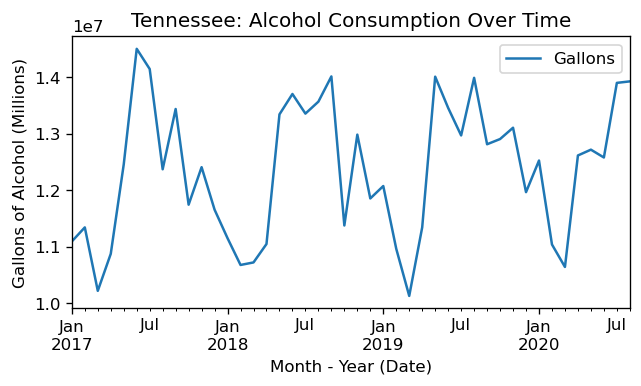

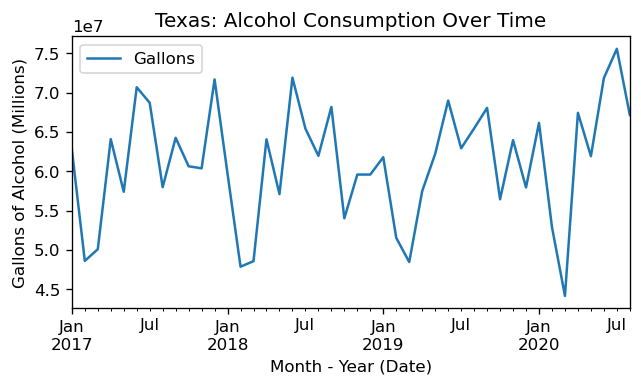

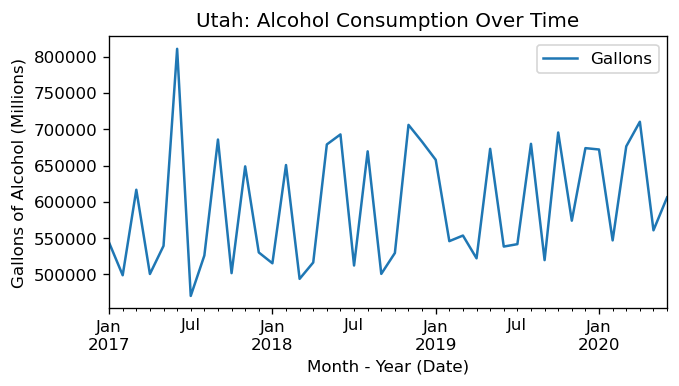

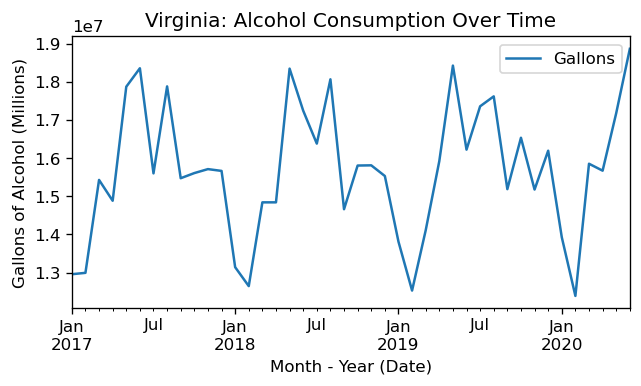

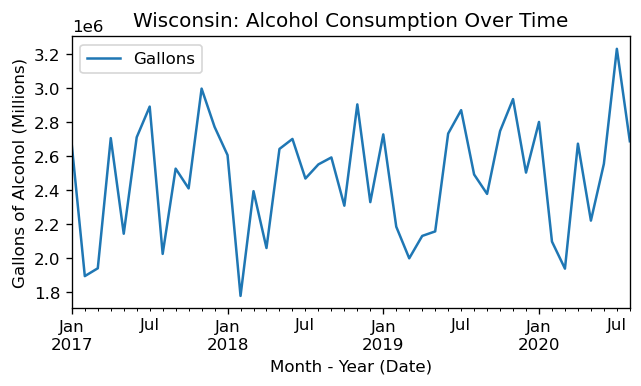

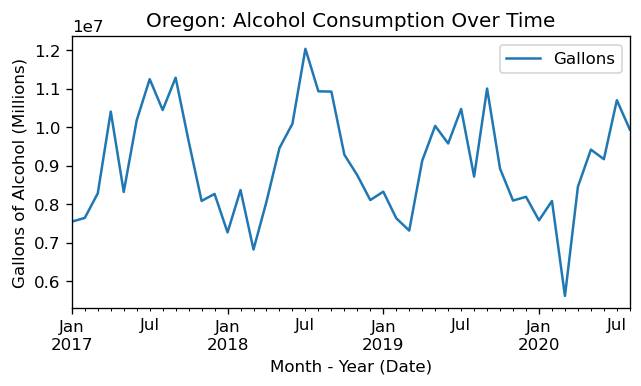

In [44]:
states = alcohol_sales_data["State"].unique()

state = "Alaska"

for state in states:

    #Filter for State ONLY
    state_df = alcohol_sales_data.loc[alcohol_sales_data["State"] == state]

    # Groupby Data Frame by Date
    state_by_year = state_df.groupby(['Month - Year (Date)'])

    # Find sum of gallons
    state_total_gallons = state_by_year["Gallons"].sum()

    # Find sum of ethanol
    state_total_ethanol = state_by_year["Ethanol"].sum()

    # Find average of population
    state_avg_pop = state_by_year["Population"].mean()

    # Find average pc
    state_avg_pc = state_by_year["PerCapita"].mean()

    cleaned_state_df = pd.DataFrame({
        "Gallons": state_total_gallons,
        "Ethanol": state_total_ethanol,
        "Population": state_avg_pop,
        "PerCapita": state_avg_pc

    })
    #Plot State Alcohol Gallons Over Time
    cleaned_state_df.plot.line( y='Gallons', title=f"{state}: Alcohol Consumption Over Time", figsize=(6,3))
    plt.ylabel('Gallons of Alcohol (Millions)')

    #Save Figure to PNG
    plt.savefig(f"Images/{state}_alcohol_consumption.png")
    plt.show()

# Seasonal Comparison of Alcohol Consumption Over Years

In [22]:
#Set figure size & dpi
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import Data
df = pd.read_csv('Data/alcsales_August2020_codedfullfile_2.csv', parse_dates=['Month - Year (Date)'], index_col='Month - Year (Date)')
df.reset_index(inplace=True)

updated_df = df.rename(columns={"Month - Year (Date)": "date"})
# Prepare data
updated_df['Year'] = [d.year for d in updated_df.date]
updated_df['Month.1'] = [d.strftime('%b') for d in updated_df.date]
years = updated_df['Year'].unique()
month_names = updated_df["Month.1"].unique()

# Limit the dataset to months where we have observations for 2020 (ie Jan - Aug)
updated_df = updated_df.loc[updated_df.Month < 8].copy()

updated_df.head()

,date,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric)
0,2017-01-01,2017,1,2,1,103645,42598,593378,0.0718,Alaska,Jan,January 2017,1 2017
1,2017-01-01,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,Jan,January 2017,1 2017
2,2017-01-01,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,Jan,January 2017,1 2017
3,2017-01-01,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,Jan,January 2017,1 2017
4,2017-01-01,2017,1,10,1,180388,74139,799550,0.0927,Delaware,Jan,January 2017,1 2017


In [41]:
#Run national groupby & agg
national_groupby = updated_df.groupby(['Year', 'Month']).aggregate({"Gallons": 'sum', "Month.1":'first','PerCapita':'sum'}).reset_index()
national_groupby.head()

,Year,Month,Gallons,Month.1,PerCapita
0,2017,1,213428134,Jan,2.9843
1,2017,2,202554024,Feb,2.9446
2,2017,3,234341479,Mar,3.4505
3,2017,4,242022452,Apr,3.4304
4,2017,5,253716538,May,3.7315


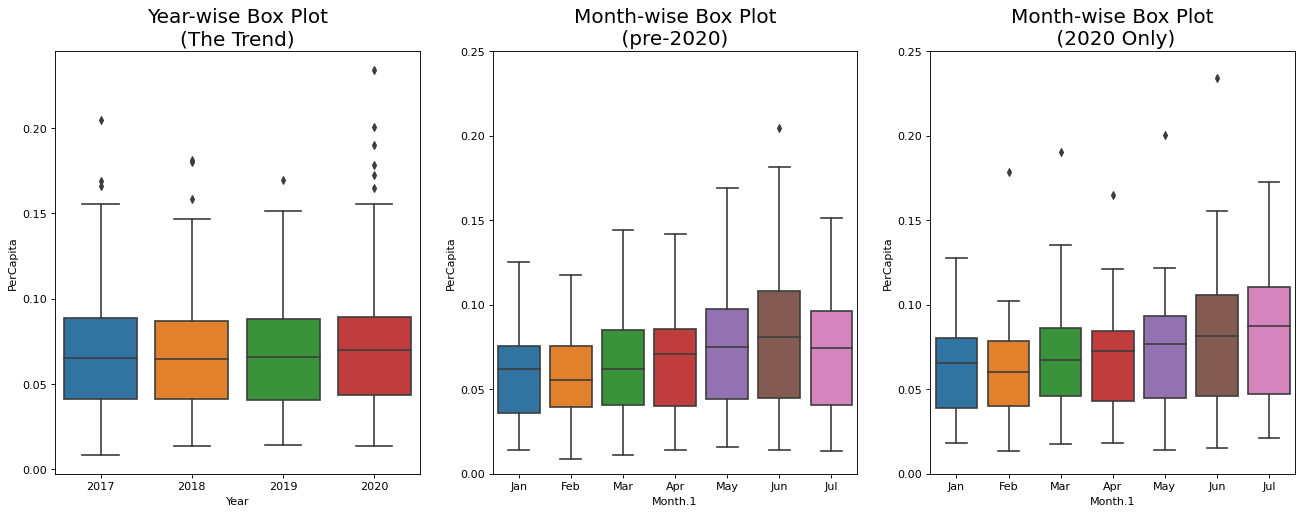

In [45]:
# Draw Plot
fig, axes = plt.subplots(1, 3, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='PerCapita', data=updated_df, ax=axes[0])
sns.boxplot(x='Month.1', y='PerCapita', data=updated_df.loc[updated_df.Year < 2020], ax = axes[1])
sns.boxplot(x='Month.1', y='PerCapita', data=updated_df.loc[updated_df.Year == 2020], ax = axes[2])


# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
axes[1].set_title('Month-wise Box Plot\n (pre-2020) ', fontsize=18)
axes[2].set_title('Month-wise Box Plot\n (2020 Only)', fontsize=18)

axes[1].set_ylim(0, 0.25)
axes[2].set_ylim(0, 0.25)

#Save Figure to PNG & show
plt.savefig(f"Images/yoy_box_plot.png")
plt.show()

# Linear Regression: Alcohol Consumption Per Capita Against COVID Stringency

In [26]:
# File to load for severity index - file already cleaned for states with available alcohol data
file_path_2 = "Data/cleaned_covid_stringency_index.csv"

# Read Purchasing File and store into Pandas data frame
covid_stringency_index = pd.read_csv(file_path_2)

covid_stringency_index.head()

,RegionName,Average Stringency Index,Average Stringency Legacy Index,Average Government Response,Average Containment Health Risk,Average Economic Support Index
0,Alaska,40.972890,49.336651,44.245046,43.530826,48.165138
1,Arkansas,36.332156,42.355596,35.971743,38.969220,19.266055
2,Colorado,41.367936,45.093624,39.550550,39.496468,39.850917
3,Connecticut,42.490046,48.216651,43.641789,44.528440,38.761468
4,Delaware,48.011422,52.954587,47.494633,48.290780,43.119266


In [27]:
#file to load for cleaned state by state alcohol consumption
file_path_3 = "Data/grouped_state_df.csv"

# Read Purchasing File and store into Pandas data frame
grouped_state_df_file = pd.read_csv(file_path_3)

grouped_state_df_file.head()

,State,Count,Gallons,Ethanol,Total Population,Avg PerCapita
0,Alaska,132,6165264,6165264,590760,0.079049
1,Arkansas,132,16429378,16429378,2465297,0.050443
2,Colorado,132,49557495,49557495,4715895,0.079425
3,Connecticut,129,26302609,26302609,3019150,0.067557
4,Delaware,129,10447503,10447503,808146,0.100049


In [28]:
#Merge files
merged_df = pd.concat([covid_stringency_index, grouped_state_df_file], axis=1, join='inner')
df.set_index('State', inplace=True)

merged_df.head()

,RegionName,Average Stringency Index,Average Stringency Legacy Index,Average Government Response,Average Containment Health Risk,Average Economic Support Index,State,Count,Gallons,Ethanol,Total Population,Avg PerCapita
0,Alaska,40.972890,49.336651,44.245046,43.530826,48.165138,Alaska,132,6165264,6165264,590760,0.079049
1,Arkansas,36.332156,42.355596,35.971743,38.969220,19.266055,Arkansas,132,16429378,16429378,2465297,0.050443
2,Colorado,41.367936,45.093624,39.550550,39.496468,39.850917,Colorado,132,49557495,49557495,4715895,0.079425
3,Connecticut,42.490046,48.216651,43.641789,44.528440,38.761468,Connecticut,129,26302609,26302609,3019150,0.067557
4,Delaware,48.011422,52.954587,47.494633,48.290780,43.119266,Delaware,129,10447503,10447503,808146,0.100049


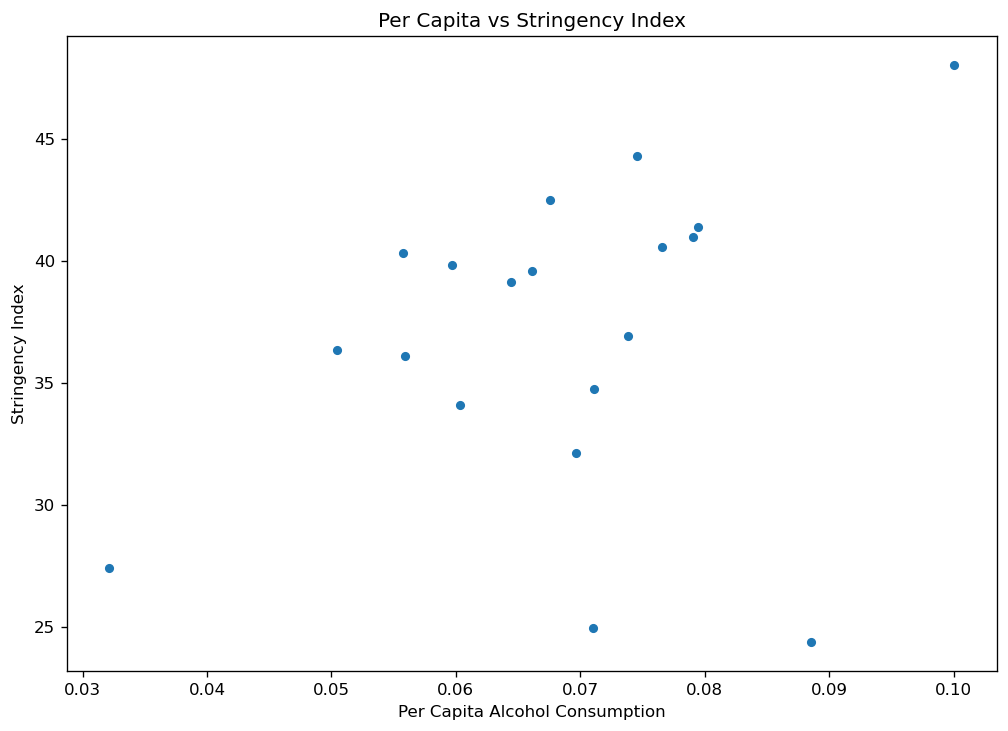

In [29]:
# Generate a scatter plot of perCapita alcohol consumption vs. average stringency index per State

#Assign variables for perCapita alcohol consumption and stringency 
per_capita_2 = merged_df['Avg PerCapita']
stringency_index_2 = merged_df['Average Stringency Index']

#create datagram for above variables
per_capita_stringency_index = pd.DataFrame({
    "Per Capita Alcohol Consumption": per_capita_2,
    "Stringency Index": stringency_index_2
})

#Plot
per_capita_stringency_index.plot.scatter(x="Per Capita Alcohol Consumption", y="Stringency Index", title="Per Capita vs Stringency Index")

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for per capita and strngency index for all states
correlation = st.pearsonr(per_capita_2,stringency_index_2)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.31


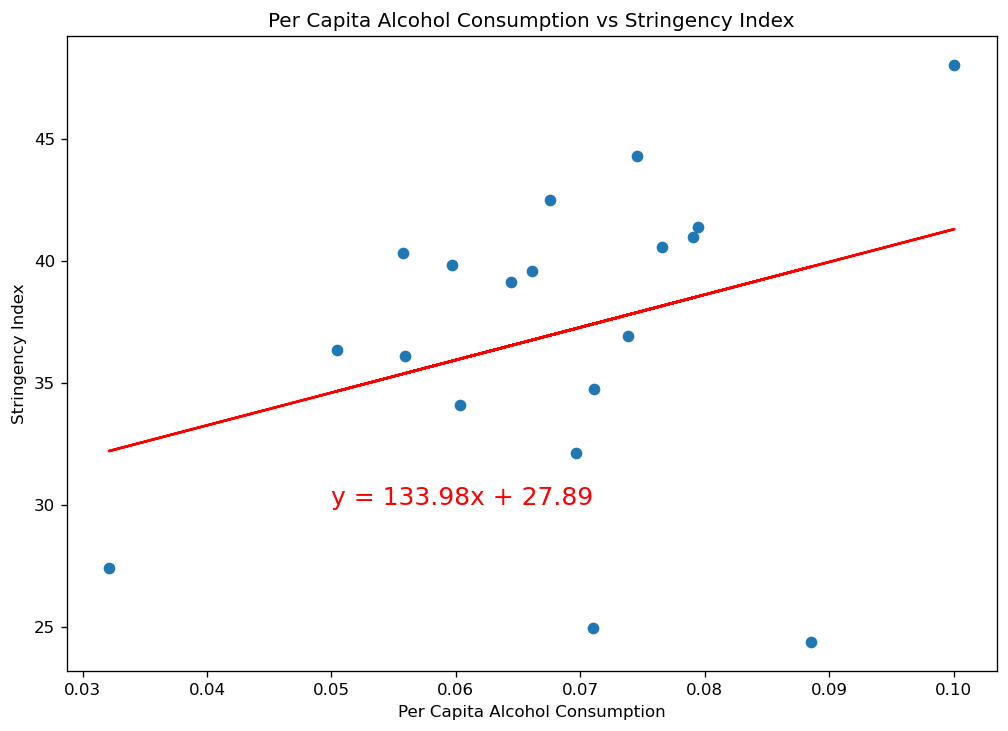

In [46]:
#Map out linear regression analysis
x_values = per_capita_2
y_values = stringency_index_2
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.05,30),fontsize=15,color="red")
plt.xlabel('Per Capita Alcohol Consumption')
plt.ylabel('Stringency Index')
plt.title("Per Capita Alcohol Consumption vs Stringency Index")
plt.savefig(f"Images/per_capita_vs_stringency.png")
plt.show()

# Linear Regression: Alcohol Consumption Per Capita Against New Covid Cases

In [32]:
#Filter alcohol consumption data for only 2020 results
alcohol_sales_data_2020_only = alcohol_sales_data.loc[alcohol_sales_data["Year"] == 2020]

#Show head
alcohol_sales_data_2020_only.head()

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
1872,2020,1,2,1,121885,50095,589481,0.0850,Alaska,January,January 2020,1 2020,2020-01-01
1873,2020,1,5,1,325925,133955,2476087,0.0541,Arkansas,January,January 2020,1 2020,2020-01-01
1874,2020,1,8,1,896700,368544,4789291,0.0770,Colorado,January,January 2020,1 2020,2020-01-01
1875,2020,1,9,1,656658,269886,3019188,0.0894,Connecticut,January,January 2020,1 2020,2020-01-01
1876,2020,1,10,1,175845,72272,816603,0.0885,Delaware,January,January 2020,1 2020,2020-01-01


In [33]:
#Read in covid data

# File path to load
covid_data_path_1 = "Data/Cum_cases_per_100000.csv"

# Read file and store into Pandas data frame
covid_cases_cum_100000 = pd.read_csv(covid_data_path_1)


#Show head
covid_cases_cum_100000.head()


,Month,Alaska,Arkansas,Colorado,Connecticut,Delaware,Florida,Illinois,Kansas,Kentucky,Louisiana,Massachusetts,Missouri,North Dakota,Tennessee,Texas,Utah,Virginia,Wisconsin
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-01,3.6,4.2,10.4,13.2,6.3,5.1,8.4,2.5,2.4,20.3,16.1,3.4,3.3,6.1,2.0,5.5,2.9,4.9
3,2020-04-01,37.8,58.7,152.3,436.4,235.9,101.5,211.1,62.8,55.5,448.5,473.2,78.5,64.8,92.2,54.6,87.0,92.2,68.0
4,2020-05-01,53.9,160.6,370.0,1017.2,769.7,208.6,717.2,262.2,166.4,736.1,1208.7,173.6,244.6,255.9,159.2,225.4,358.4,212.7


In [34]:
#"Transpose" data to get ready to merge with alcohol consumption df
formatted_covid_cases = pd.melt(covid_cases_cum_100000, id_vars=['Month'])


#Show
formatted_covid_cases.head()

,Month,variable,value
0,2020-01-01,Alaska,0.0
1,2020-02-01,Alaska,0.0
2,2020-03-01,Alaska,3.6
3,2020-04-01,Alaska,37.8
4,2020-05-01,Alaska,53.9


In [35]:
#Rename columns in transposed table and format datetime
final_covid_cases_df = formatted_covid_cases.rename(columns = {"variable": "State" , "value": "New Cases (100000)"})
final_covid_cases_df['Month'] = pd.to_datetime(final_covid_cases_df['Month'])

#Show
final_covid_cases_df.head()

,Month,State,New Cases (100000)
0,2020-01-01,Alaska,0.0
1,2020-02-01,Alaska,0.0
2,2020-03-01,Alaska,3.6
3,2020-04-01,Alaska,37.8
4,2020-05-01,Alaska,53.9


In [36]:
#Merge files
merged_df_2 = pd.merge(final_covid_cases_df, alcohol_sales_data_2020_only, how='left', left_on=['Month', "State"], right_on = ['Month - Year (Date)','State'])

#Show
cleaned_merged_df_2 = merged_df_2.dropna()

cleaned_merged_df_2.head()

,Month_x,State,New Cases (100000),Year,Month_y,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2020-01-01,Alaska,0.0,2020.0,1.0,2.0,1.0,121885.0,50095.0,589481.0,0.0850,January,January 2020,1 2020,2020-01-01
1,2020-01-01,Alaska,0.0,2020.0,1.0,2.0,2.0,143291.0,18485.0,589481.0,0.0314,January,January 2020,1 2020,2020-01-01
2,2020-01-01,Alaska,0.0,2020.0,1.0,2.0,3.0,873146.0,39292.0,589481.0,0.0667,January,January 2020,1 2020,2020-01-01
3,2020-02-01,Alaska,0.0,2020.0,2.0,2.0,1.0,124792.0,51290.0,589481.0,0.0870,February,February 2020,2 2020,2020-02-01
4,2020-02-01,Alaska,0.0,2020.0,2.0,2.0,2.0,183387.0,23657.0,589481.0,0.0401,February,February 2020,2 2020,2020-02-01


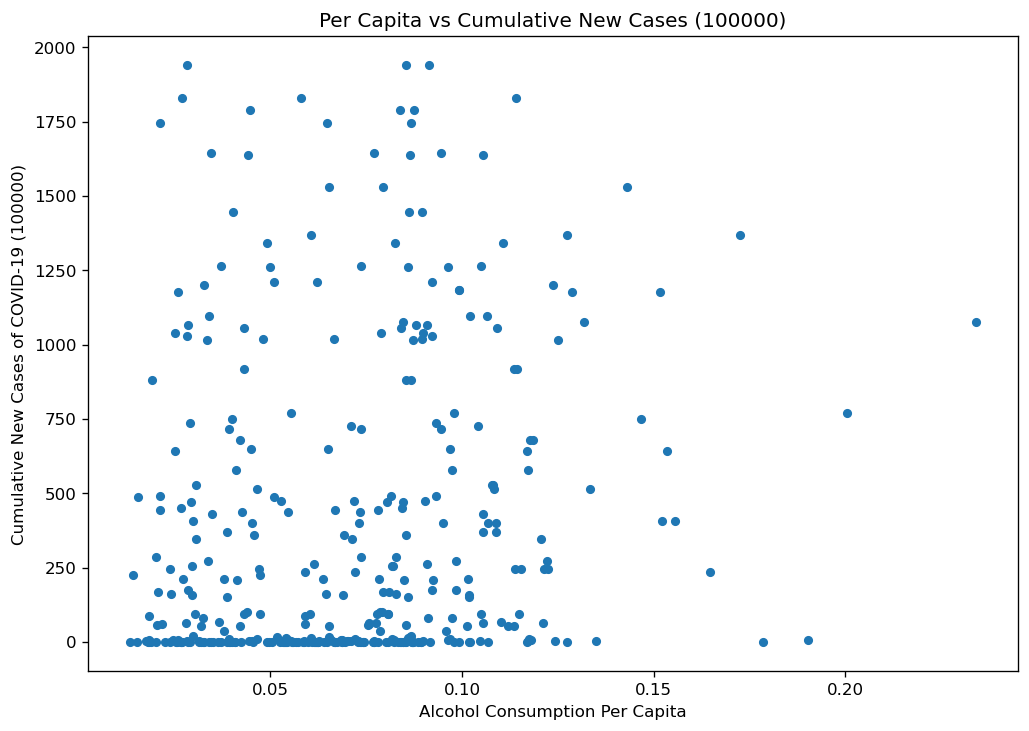

In [37]:
# Generate a scatter plot of perCapita alcohol consumption vs. cumulative new cases of COVID-19 per State

#Assign variables for perCapita alcohol consumption and stringency 
covid_cases_var = cleaned_merged_df_2['New Cases (100000)']
covid_cases_alc_cons_var = cleaned_merged_df_2['PerCapita']

#create datagram for above variables
covid_new_cases_alc_consumption_df = pd.DataFrame({
    "Cumulative New Cases of COVID-19 (100000)": covid_cases_var,
    "Alcohol Consumption Per Capita": covid_cases_alc_cons_var
})

#Plot
covid_new_cases_alc_consumption_df.plot.scatter(x="Alcohol Consumption Per Capita", y="Cumulative New Cases of COVID-19 (100000)", title="Per Capita vs Cumulative New Cases (100000)")

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for per capita and strngency index for all states
correlation_2 = st.pearsonr(covid_cases_var, covid_cases_alc_cons_var)
print(f"The correlation between both factors is {round(correlation_2[0],2)}")

The correlation between both factors is 0.16


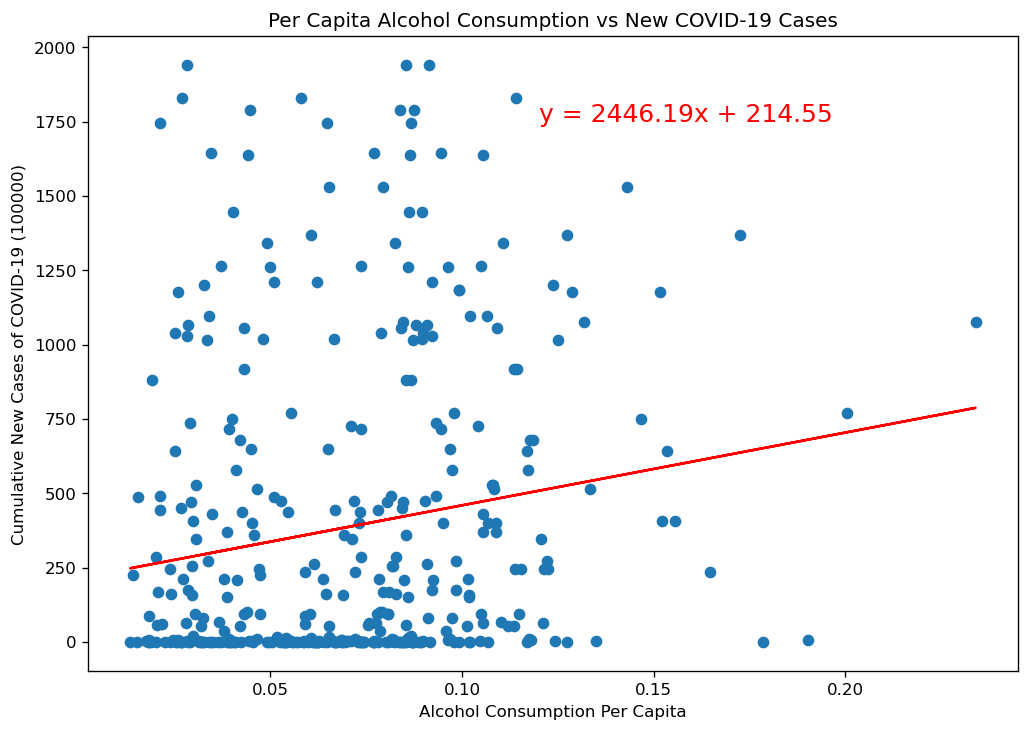

In [47]:
#Map out linear regression analysis
x_values = covid_cases_alc_cons_var
y_values = covid_cases_var
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.12,1750),fontsize=15,color="red")
plt.xlabel('Alcohol Consumption Per Capita')
plt.ylabel('Cumulative New Cases of COVID-19 (100000)')
plt.title("Per Capita Alcohol Consumption vs New COVID-19 Cases")
plt.savefig(f"Images/per_capiita_vs_new_vases.png")
plt.show()